In [46]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
??fastbook.setup_book
from fastbook import *
from fastai.vision.all import *
import fastbook
fastbook.setup_book()

In [47]:
# Transformations are applied only on training dataset
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)

In [48]:
path = Path("C:\\Users\\Tej\\Desktop\\mask-detection-bot-main\\data")

In [49]:

fns = get_image_files(DATASET_PATH)
fns

(#0) []

In [40]:



dls = mask_datablock.dataloaders(DATASET_PATH,num_workers=0)

TypeError: 'NoneType' object is not iterable

In [23]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])

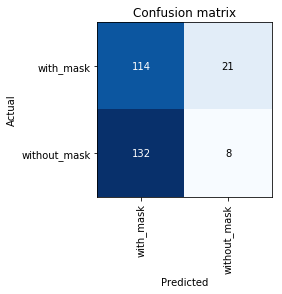

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

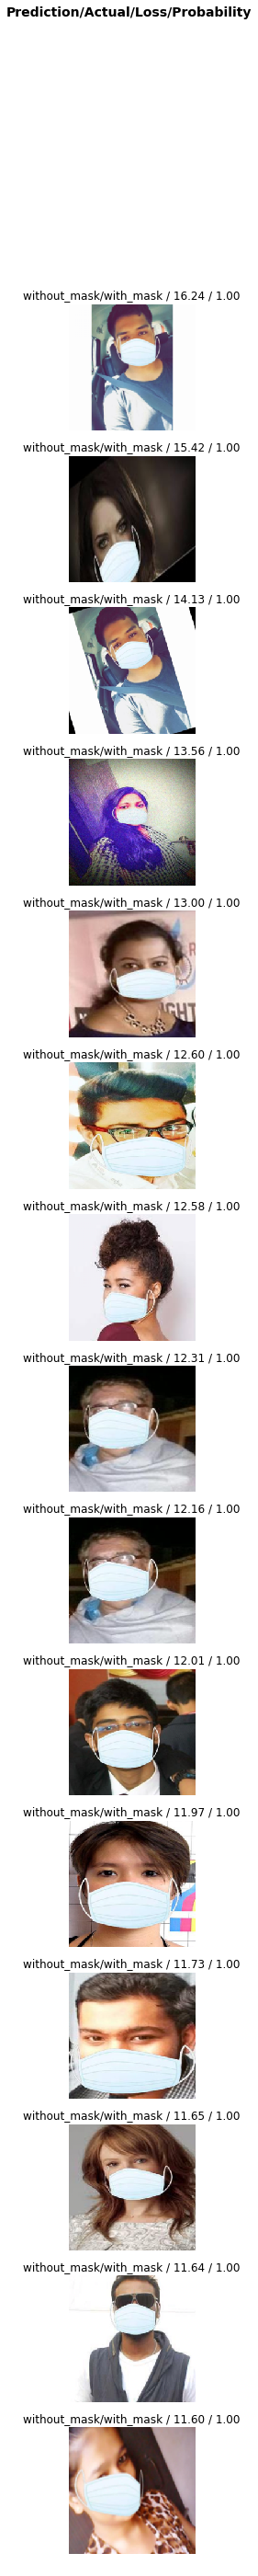

In [17]:
interp.plot_top_losses(15, nrows=15)

In [13]:
learn.export("model2.pkl")